[我的筆記](https://www.notion.so/data-science-06b4e6e209574feab38f27cf88413c45)

In [171]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline 
df0 = pd.read_csv("cdata.csv")
df = df0.drop(columns = ["cluster"])
def color(df,centroid): #定義一個fucntion讓他能夠分配顏色到每筆data
    for i in centroid.keys(): #算出每個點之於每個中心點的距離(distance)跟距離平方(SSE)
        df["distance_{}".format(i)] = (np.sqrt(((df['x']-centroid[i][0])**2)+((df['y']-centroid[i][1])**2 ))) #距離
        df["SSE_{}".format(i)] = (((df['x']-centroid[i][0])**2)+((df['y']-centroid[i][1])**2 ))  #距離平方
    cen_dis = ["distance_{}".format(i) for i in centroid.keys()] #創造一個list存每個distance
    cen_sse = ["SSE_{}".format(i) for i in centroid.keys()] #創造一個list存每個距離平方
    df["closest"] = df.loc[:,cen_dis].idxmin(axis = 1) #找出最短的距離的index(例如distance_1是最短的，就取他當["closest"])
    df["closest"] = df["closest"].map(lambda x:int(x.lstrip('distance_')))  #用strip以及確保他為int  
    df["color"] = df["closest"].map(lambda x:colorr[x]) #賦予顏色
    df["the shortest distance"] = df.loc[:,cen_sse].min(axis = 1) #找出最短的平方距離
    df["the shortest distance"] = df["the shortest distance"].map(lambda x:float(x)) #確保他為float
    return df
def new_cen(centroid): #重新設定centroid
    for i in centroid.keys():
        centroid[i][0] = np.mean(df[df["closest"] == i]['x']) 
        centroid[i][1] = np.mean(df[df["closest"] == i]['y'])
    return centroid
colorr = {1:'r',2:'g',3:'b',4:'y',5:'c',6:'m',7:'k',8:'dimgray',9:"bisque",10:'forestgreen'}


# Q1

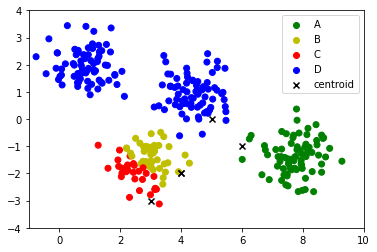

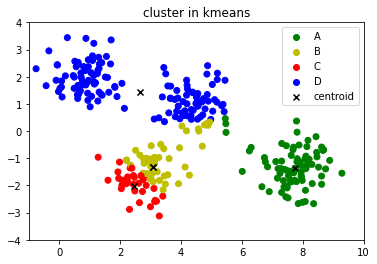

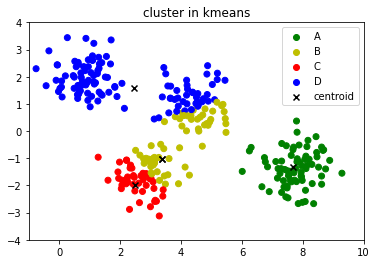

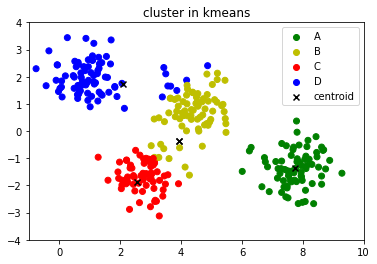

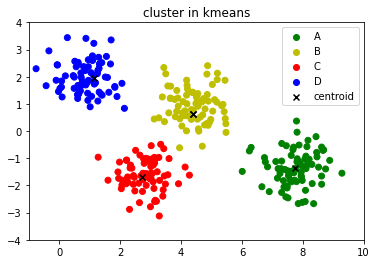

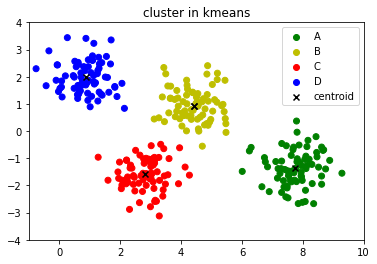

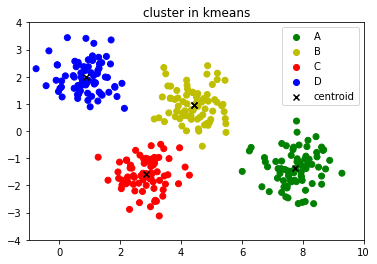

總共做了 7 次


Text(0.5, 1.0, 'cluster in cdata')

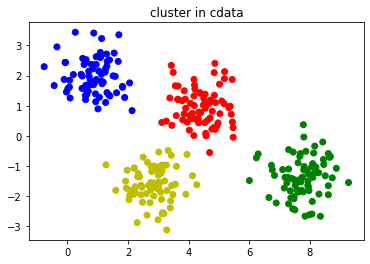

In [166]:
k = 4
centroid = {i+1:[np.random.randint(min(df['x']),max(df['x'])),np.random.randint(min(df['y']),max(df['y']))] for i in range(k)}
#從最小到最大的值當中隨機取出K個當centroid
df1 = color(df,centroid) #用剛剛的color function
plt.scatter(df1['x'],df1['y'],color = df1["color"]) #畫出初始圖片的樣子
for i in centroid.keys():
    plt.scatter(*centroid[i],color = "black",marker="x") #畫出每個centroid
plt.xlim(-1,10)
plt.ylim(-4,4)
plt.scatter(x=-10,y=-10,color = "g",label = "A")
plt.scatter(x=-10,y=-10,color = "y",label = "B")
plt.scatter(x=-10,y=-10,color = "r",label = "C")
plt.scatter(x=-10,y=-10,color = "b",label = "D") #這裡因為第五行只有一行，卻有四個label要給，所以用這種方式來標明，把X跟Y的值都設定在圖片範圍外來給label
plt.scatter(*centroid[i],color = "black",marker="x",label = "centroid") #這裡用偷吃步的方式給出label，因為有for迴圈的關係，每次給到的label都有K個
plt.legend()
plt.show()
number = 0
while number < 100: #開始進行重複給顏色以及update centroid，由於怕最後會有一些很微小的變動導致while迴圈不會停止，所以限定次數100次
    colsest_centroid = df1["closest"].copy(deep = True) #先複製原本的centroid
    centroid = new_cen(centroid) #用function更新centroid
    df1 = color(df1,centroid) #用function重新指定color(哪個centroid離最近) 
    plt.scatter(df1['x'],df1['y'],color = df1["color"])
    for i in centroid.keys():
        plt.scatter(*centroid[i],color = "black",marker="x")
    plt.xlim(-1,10)
    plt.ylim(-4,4)
    plt.scatter(x=-10,y=-10,color = "g",label = "A")
    plt.scatter(x=-10,y=-10,color = "y",label = "B")
    plt.scatter(x=-10,y=-10,color = "r",label = "C")
    plt.scatter(x=-10,y=-10,color = "b",label = "D")
    plt.scatter(*centroid[i],color = "black",marker="x",label = "centroid")
    plt.legend()
    plt.title("cluster in kmeans")
    plt.show() #畫圖
    number += 1 
    if colsest_centroid.equals(df1["closest"]): #如果新的centroid跟就得一樣就停止
        break
print("總共做了",number+1,"次")
df0["color"]=""
for i in range(len(df0["cluster"])):
    if df0["cluster"][i]==0:
        df0.loc[i,"color"]="r"
    elif df0["cluster"][i]==1:
        df0.loc[i,"color"]="b"
    elif df0["cluster"][i]==2:
        df0.loc[i,"color"]="y"
    elif df0["cluster"][i]==3:
        df0.loc[i,"color"]="g"
plt.scatter(df0['x'],df0['y'],color = df0["color"])
plt.title("cluster in cdata") #這是用原本資料設定cluster來比對kmeans
#使用kmeans有遇到的問題就是如果一開始設定的centroid有兩個太靠近且離點太遠，
#有可能會導致其中一個centroid沒有被分配到任何的資料，最後資料就只會被分類成3群或是更少

# Q2

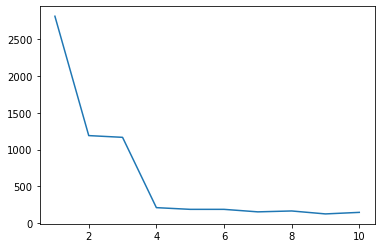

In [175]:
X = list(range(1,11,1)) #X設定為10次
SSE2 = []
for i in range(max(X)):
    k = X[i] #K值設定從1到10
    centroid = {i+1:[np.random.randint(min(df['x']),max(df['x'])),np.random.randint(min(df['y']),max(df['y']))] for i in range(k)}
    df2 = color(df,centroid)
    number = 0
    while number < 100:
        colsest_centroid = df2["closest"].copy(deep = True)
        centroid = new_cen(centroid)
        df2 = color(df2,centroid)
        number += 1
        if colsest_centroid.equals(df3["closest"]):
            break
    SSE2.append(df2["the shortest distance"].sum())
plt.plot(X,SSE2)
#這裡重複設定k值從1到10做10次，然後把每次的SSE都append到SSE2這個list裡面最後畫出來
#發現K值為2跟4時會有明顯的轉折

In [168]:
SSE2

[2812.137335869,
 1190.7810063914321,
 546.8913452710292,
 546.8913452710292,
 199.14688975893768,
 171.36709217202488,
 160.41828107480808,
 153.76353062336443,
 170.0223590050612,
 135.56893425020263]

# Q3

Text(0.5, 1.0, 'result of ten timesrandomli pick the initial points with k = 10')

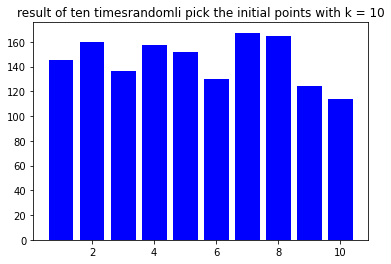

In [169]:
k = 10
SSE3 = []
for i in range(k):
    centroid = {i+1:[np.random.randint(min(df['x']),max(df['x'])),np.random.randint(min(df['y']),max(df['y']))] for i in range(k)}
    df3 = color(df,centroid)
    number = 0
    while number < 100:
        colsest_centroid = df3["closest"].copy(deep = True)
        centroid = new_cen(centroid)
        df3 = color(df3,centroid)
        number += 1
        if colsest_centroid.equals(df3["closest"]):
            break
    SSE3.append(df3["the shortest distance"].sum())
X = list(range(1,11,1))
plt.bar(X,SSE3,color = "b",)
plt.title("result of ten timesrandomli pick the initial points with k = 10")
#這裡設定K值為10然後進行10次把每次的SSE都丟進SSE3這個list裡面

In [170]:
df3

,x,y,distance_1,SSE_1,distance_2,SSE_2,distance_3,SSE_3,distance_4,SSE_4,...,distance_6,SSE_6,distance_7,SSE_7,distance_8,SSE_8,distance_9,SSE_9,distance_10,SSE_10
0,2.1364,0.8369,6.267183,39.277588,3.006766,9.040641,1.853467,3.435341,2.601093,6.765686,...,2.425844,5.884720,3.177834,10.098627,5.986348,35.836362,2.067236,4.273464,2.218617,4.922260
1,7.4096,-1.4137,0.941703,0.886805,2.891458,8.360532,4.101213,16.819944,4.151820,17.237610,...,5.231395,27.367493,4.457441,19.868783,0.388530,0.150956,7.568145,57.276812,4.264436,18.185411
2,5.0996,1.1552,3.671653,13.481038,0.830264,0.689338,1.150940,1.324663,0.697813,0.486944,...,4.005689,16.045547,3.957120,15.658802,3.808013,14.500960,4.371269,19.107995,3.004409,9.026474
3,7.8149,-1.0186,0.389651,0.151828,3.029818,9.179796,4.257169,18.123490,4.172395,17.408881,...,5.662527,32.064217,4.937228,24.376215,0.824199,0.679303,7.727679,59.717027,4.662020,21.734426
4,1.8925,1.2714,6.628882,43.942079,3.343516,11.179097,2.139205,4.576197,2.740971,7.512920,...,2.874459,8.262516,3.664923,13.431657,6.402308,40.989549,1.572218,2.471869,2.716644,7.380155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.5798,1.9737,7.172882,51.450242,3.886517,15.105014,2.659050,7.070545,3.044729,9.270372,...,3.612629,13.051090,4.430201,19.626681,7.028092,49.394079,0.840145,0.705844,3.484181,12.139517
296,1.3918,2.5183,7.572620,57.344573,4.307679,18.556097,3.087460,9.532409,3.330695,11.093529,...,4.181998,17.489105,5.006337,25.063414,7.486966,56.054655,0.441839,0.195222,4.055716,16.448833
297,4.5359,0.4390,3.858670,14.889337,0.574790,0.330384,0.683559,0.467254,1.212795,1.470872,...,3.107385,9.655840,3.053483,9.323760,3.720555,13.842528,4.150862,17.229656,2.093899,4.384414
298,7.7911,0.3695,1.284820,1.650763,2.692210,7.247993,3.831548,14.680761,3.431598,11.775864,...,5.941859,35.305683,5.421717,29.395014,2.173932,4.725982,7.174006,51.466357,4.874578,23.761508


In [173]:
SSE3

[145.2228657973612,
 160.1182229206202,
 136.770979383544,
 157.16373587940882,
 151.59459439321478,
 130.12359653164742,
 167.3149079940111,
 164.91037321287007,
 124.59343749439859,
 114.01810771324296]